## 6.5 ハイパーパラメータの検証
- 重みやバイヤスの他に、学習で更新されない**ハイパーパラメータ**が多くある。
- 各層のニューロンの数・バッチサイズ・学習係数、Weight decay

### 6.5.1 検証データ
注意点：**テストデータを使ってハイパーパラメータを評価してはいけない。**

- テストデータだけに適合するようにハイパーパラメータが調整されてしまうと、ハイパーパラメータの値はテストデータに対して過学習してしまうから。
- ハイパーパラメータ専用の確認データを「検証データ」と呼ぶ。

データセットによっては、あらかじめ訓練データ・検証データ・テストデータの3つのデータに分かれているが、データ訓練データとテストデータのみからなる場合は、訓練データのうち20%ほどを検証データとして分離する。


### 6.5.2 ハイパーパラメータの最適化

- ステップ0
  - ハイパーパラメータの範囲を設定する（ハイパーパラメータは、1.0か1.1かのようなサンプリングではなく、$10^{-3}$から$10^{-8}$のような対数スケールの範囲でサンプリングする。
）
- ステップ1
  - 設定されたハイパーパラメータの範囲から、ランダムにサンプリングする
- ステップ2
  - ステップ1でサンプリングされたハイパーパラメータの値を使用して学習を行う。検証データで認識精度を評価する。(ただし、時間がかかるので小さめのエポックで)
- ステップ3
  - ステップ1,2を100回ほど繰り返して認識精度の結果からハイパーパラメータの範囲を狭める

この手法は、科学的手法と言うよりは実験的手法である。より洗練された手法として、「ベイズ最適化」により、厳密に効率よくハイパーパラメータの最適化を行える。

### 6.5.3 ハイパーパラメータの最適化の実装


val acc:0.06 | lr:2.210431949533709e-05, weight decay:2.4936031580390174e-08
val acc:0.16 | lr:0.0003564264165000402, weight decay:9.267462235625314e-08
val acc:0.25 | lr:0.002155185992569332, weight decay:1.1154208987587997e-08
val acc:0.11 | lr:0.0010370417679800574, weight decay:8.605915416580463e-08
val acc:0.74 | lr:0.0062898446562958815, weight decay:5.0291919886966734e-08
val acc:0.1 | lr:9.425989456074407e-06, weight decay:3.427251003205403e-06
val acc:0.19 | lr:0.00024302414017785714, weight decay:2.238320952034489e-08
val acc:0.24 | lr:0.001018494633807838, weight decay:1.5756437033081932e-06
val acc:0.16 | lr:3.732633818779356e-05, weight decay:7.021659613839149e-08
val acc:0.17 | lr:1.7920164515746195e-05, weight decay:4.155815610080766e-05
val acc:0.21 | lr:0.001370842115881199, weight decay:2.28790089036447e-05
val acc:0.42 | lr:0.0032966936865059604, weight decay:8.305906434655912e-07
val acc:0.06 | lr:2.3888994411263147e-06, weight decay:5.0069790227389644e-08
val acc:0

<IPython.core.display.Javascript object>


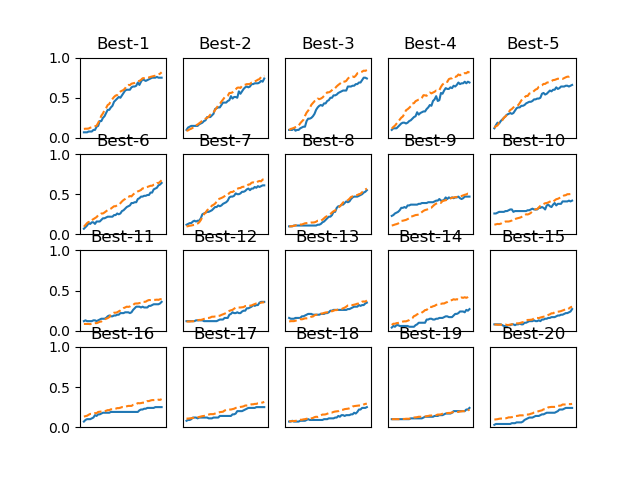

Best-2(val acc:0.74) | lr:0.0062898446562958815, weight decay:5.0291919886966734e-08
Best-3(val acc:0.74) | lr:0.006253764817099359, weight decay:1.8028098437597578e-08
Best-4(val acc:0.69) | lr:0.004409835166740236, weight decay:4.81622208264898e-05
Best-5(val acc:0.66) | lr:0.004070244609555725, weight decay:7.642996249424558e-05
Best-6(val acc:0.64) | lr:0.004492289693743301, weight decay:6.105315196756693e-06
Best-7(val acc:0.61) | lr:0.004176333487122692, weight decay:4.5991673498202455e-06
Best-8(val acc:0.55) | lr:0.003143456492852701, weight decay:8.031346878975937e-06
Best-9(val acc:0.47) | lr:0.00383396369312684, weight decay:5.7832855323047324e-08
Best-10(val acc:0.42) | lr:0.0032966936865059604, weight decay:8.305906434655912e-07
Best-11(val acc:0.36) | lr:0.0015362454116323119, weight decay:9.997422177822483e-05
Best-12(val acc:0.36) | lr:0.0019678404712408924, weight decay:3.4176158282474153e-06
Best-13(val acc:0.35) | lr:0.0012214570282104147, weight decay:1.120386062431

In [6]:
# coding: utf-8
%matplotlib notebook

import sys, os
sys.path.append("../deep-learning-from-scratch/")  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 高速化のため訓練データの削減
x_train = x_train[:500]
t_train = t_train[:500]

# 検証データの分離
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# ハイパーパラメータのランダム探索======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 探索したハイパーパラメータの範囲を指定===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# グラフの描画========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()
